**Kaggle setup**

In [0]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing all libraries**


In [1]:
import os 
import zipfile 
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.2.0


Using TensorFlow backend.


**Download and Unzip Dataset**

In [0]:
!kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets


In [0]:
local_dir='/content/covid19-xray-dataset-train-test-sets.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('/tmp')
zip_ref.close

**Path Setup**

In [0]:
train_dir=os.path.join('/tmp/xray_dataset_covid19/train')
validation_dir=os.path.join('/tmp/xray_dataset_covid19/test')

In [0]:
print("TEST")
print(len(os.listdir("/tmp/xray_dataset_covid19/test/NORMAL")))
print(len(os.listdir("/tmp/xray_dataset_covid19/test/PNEUMONIA")))
print("TRAIN")
print(len(os.listdir("/tmp/xray_dataset_covid19/train/NORMAL")))
print(len(os.listdir("/tmp/xray_dataset_covid19/train/PNEUMONIA")))

**Build the CNN model & Compile the model**

In [3]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(1024,1024,3)),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(64,(3,2),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(256,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(512,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(1024,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(2048,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),

                               
                              
                              
                              
                           
                              tf.keras.layers.Dropout(0.5),
                               
                               
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=512,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=256,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=128,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=64,activation=tf.nn.relu),
                               
                               
                               keras.layers.Dense(units=1,activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1022, 1022, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 511, 511, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 509, 510, 64)      12352     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 254, 255, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 253, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 256)     2

**image preprocessing**

In [4]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
     
      shear_range=0.2,
      zoom_range=0.3,
     
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255
)
train_generator = train_data_generator.flow_from_directory(train_dir,
                                                    batch_size=8,
                                                    class_mode='binary',
                                                    target_size=(1024,1024)) 
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                         batch_size=5,
                                                         class_mode  = 'binary',
                                                         target_size = (1024,1024))

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


**Fit the model on images**

In [5]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=18,
                              epochs=25,
                              validation_steps=8,
                              verbose=1)

Epoch 1/25
18/18 [==============================] - 42s 2s/step - loss: 0.7308 - accuracy: 0.4786 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/25
18/18 [==============================] - 40s 2s/step - loss: 0.6977 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 3/25
18/18 [==============================] - 39s 2s/step - loss: 0.6826 - accuracy: 0.5143 - val_loss: 0.6123 - val_accuracy: 0.9000
Epoch 4/25
18/18 [==============================] - 40s 2s/step - loss: 0.6160 - accuracy: 0.6714 - val_loss: 0.3516 - val_accuracy: 0.9500
Epoch 5/25
18/18 [==============================] - 41s 2s/step - loss: 0.5241 - accuracy: 0.7429 - val_loss: 0.2857 - val_accuracy: 1.0000
Epoch 6/25
18/18 [==============================] - 40s 2s/step - loss: 0.4083 - accuracy: 0.7857 - val_loss: 0.2142 - val_accuracy: 0.9250
Epoch 7/25
18/18 [==============================] - 40s 2s/step - loss: 0.5011 - accuracy: 0.7929 - val_loss: 0.6205 - val_accuracy: 0.7250
Epoch 8/25
18/18 [==

**Training and validation accuracy & loss**

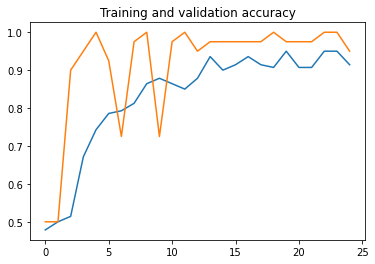

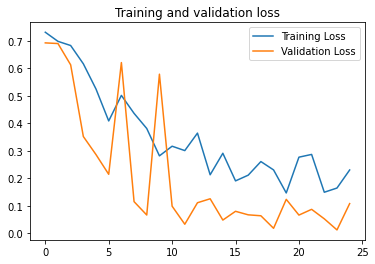

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()